# PROJECT OVERVIEW

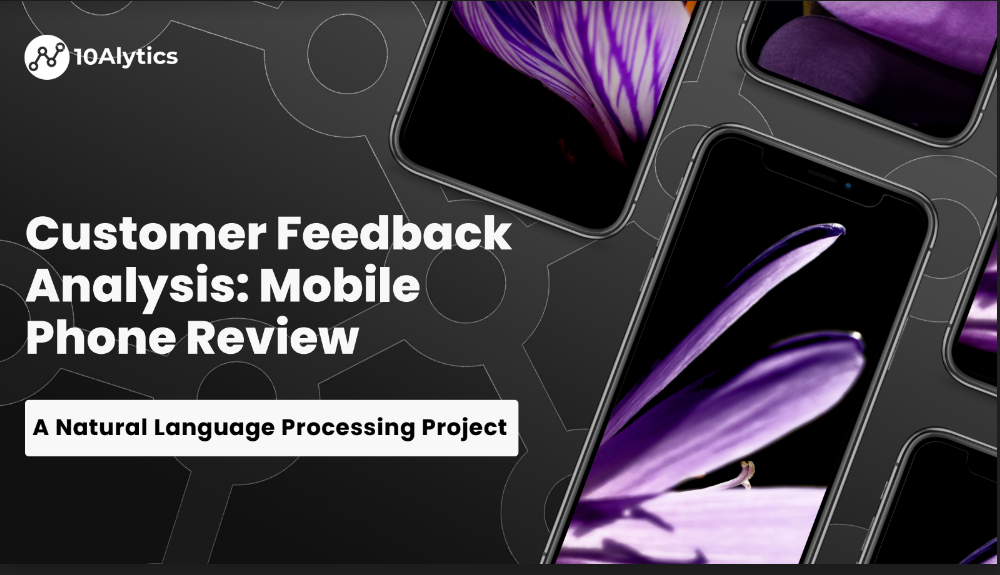

---

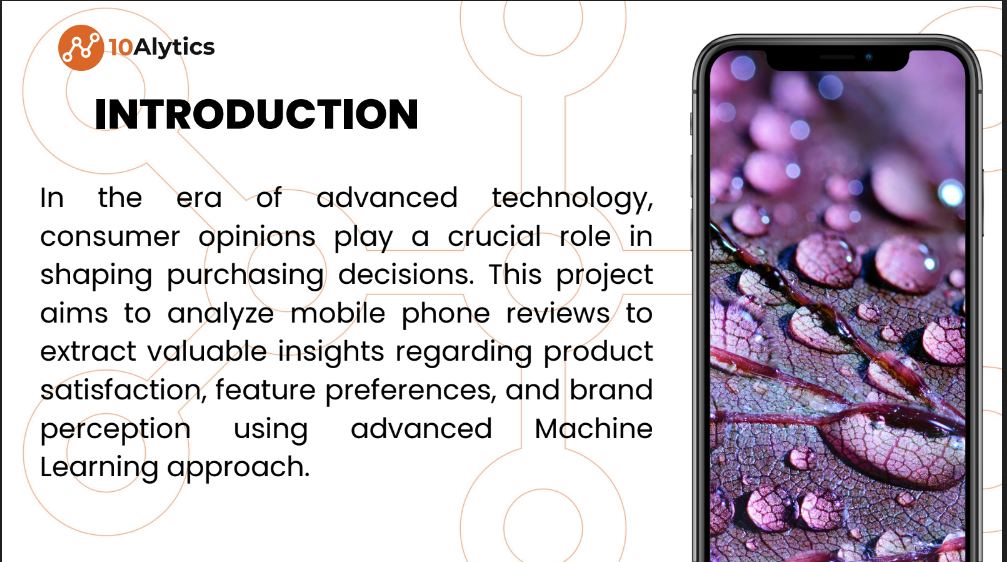

---

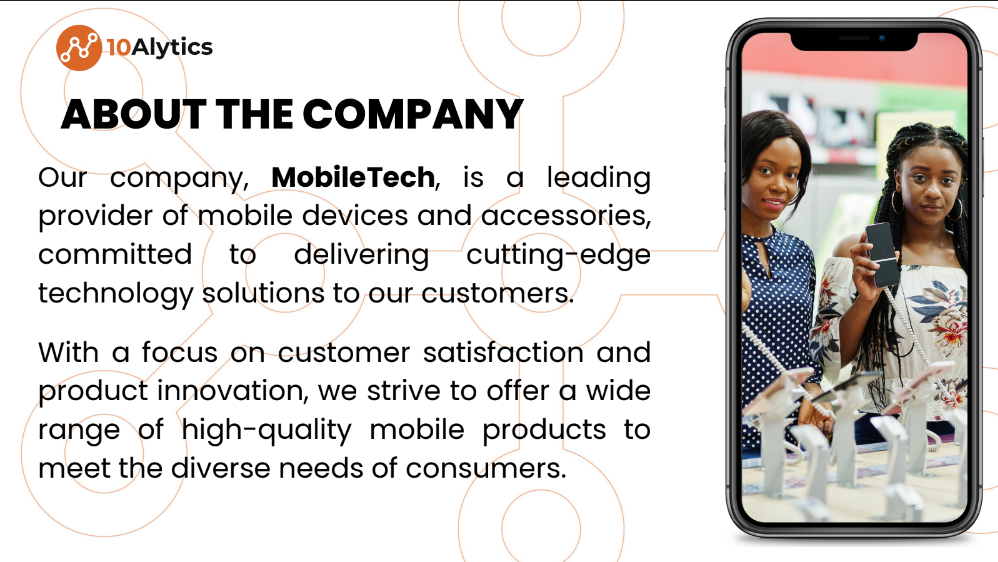

---

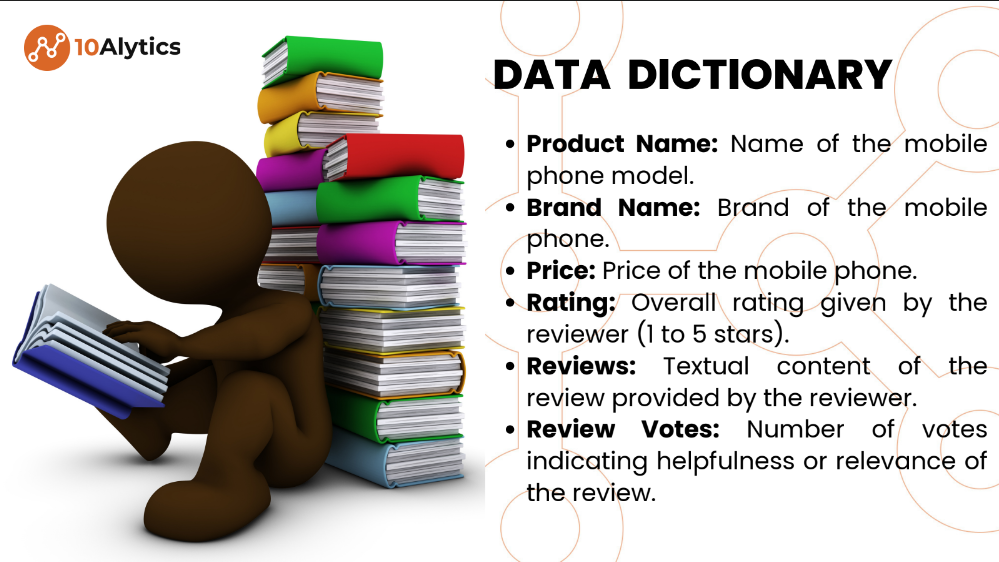

# 1. Libraries

In [1]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier  # Corrected typo
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import KFold, StratifiedKFold
# Set plot style
sns.set(color_codes=True)

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Filter FutureWarning and UserWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set(style="darkgrid")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


# 2. Data Importation

In [2]:
df = pd.read_csv('Mobile Sales Review.csv')

**A look at the data head...**

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.00
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.00
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.00
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.00
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.00


In [4]:
df.shape[0]

413840

**The data set contains `413,840`rows**

**Looking at data dypes**

In [5]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

# 3. Resolving missing Data and handling Duplicates

In [6]:
df.isnull().sum()

Product Name        0
Brand Name      62169
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

**Since the data present several missing information, I will work on how to resolve this now.**

In [7]:
# Function to extract brand name from product name
def extract_brand(product_name):
    # Split the product name by space and take the first element as brand name
    # Assuming the brand name is the first word in the product name
    return product_name.split()[0]

# Filling the missing values in the 'Brand Name' column using the 'Product Name' column
df['Brand Name'] = df['Brand Name'].fillna(df['Product Name'].apply(lambda x: extract_brand(x)))

**Next, I will fill missing values in the "Price" column by using the average price of each brand.**

In [8]:
# Grouping by 'Brand Name' and calculating the average price for each brand
brand_avg_price = df.groupby('Brand Name')['Price'].mean()

# Filling missing values in 'Price' column with the average price of the corresponding brand
df['Price'] = df.apply(lambda row: brand_avg_price[row['Brand Name']] if pd.isnull(row['Price']) else row['Price'], axis=1)

In [9]:
df.isnull().sum()

Product Name        0
Brand Name          0
Price             159
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

In [10]:
median_price = df['Price'].median()
print(f'We will now fill up the rest with the total data median price {median_price}')

We will now fill up the rest with the total data median price 149.35


In [11]:
df['Price'] = df['Price'].fillna(median_price)

In the case of the `Reviews` we will fill up by replacing missing with "Missing"

In [12]:
df.loc[:, 'Reviews'] = df['Reviews'].fillna("Missing")

In [13]:
# Calculate the median of the "Review Votes" column
median_review_votes = df['Review Votes'].median()

# Fill missing values in the "Review Votes" column with the median
df['Review Votes'].fillna(median_review_votes, inplace=True)

In [14]:
df.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

Next I will check to duplicated data and eliminate them

In [15]:
# check for duplicates
# Count the occurrences of duplicates
duplicate_counts = df.duplicated().value_counts()
duplicate_counts

False    349466
True      64374
Name: count, dtype: int64

In [16]:
#Drop Duplicates
df = df.drop_duplicates()

Checking the data size now

In [17]:
df.shape[0]

349466

**Less than 350,000 rows of data is left after cleaning and eliminating duplicates.**

# 4. Exploration and Visualization

#### Extracting Product colour from Product information.

In [18]:
import pandas as pd
import re

# Defining the list of phone colors
colors = ['Lavender', 'Cream', 'Gray', 'Black', 
          'Blue', 'Green', 'Silver', 'Bronze', 'White', 
          'Grey', 'White', 'Purple', 'Mint', 'Purple','Ultramarine',
          'Green', 'Iridescent Cloud', 'Red', 'Leather', 'Starlight', 
          'Fuchsia', 'Yellow', 'Gold',  'Violet','Navy', 'Pink', 
          'Silver', 'Rose', 'Brown', 'Cyan','Magenta', 'Orange', 
          'Khaki', 'Electric Graphite', 'Teal', 'Aurora', 'Peach',
          'Pearl', 'Platinum', 'Green', 'Graphite', 
          'Aqua', 'Plum', 'Ebony', 'Titan', 'Aubergine']


# Function to extract color from product name
def extract_color(product_name):
    for color in colors:
        match = re.search(r'\b{}\b'.format(color), product_name, flags=re.IGNORECASE)
        if match:
            return color
    return None

# Apply the function to create a new column 'Product Color'
df['Product Color'] = df['Product Name'].apply(extract_color)

df[3894:3897]


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Product Color
4595,Apple iPhone 2G 8GB (Black),Apple,129.00,1,"First of all, its no compatible with verizon (...",5.00,Black
4596,Apple iPhone 2G 8GB (Black),Apple,129.00,1,"This item arrived on time, and looked great, i...",15.00,Black
4597,Apple iPhone 2G 8GB (Black),Apple,129.00,4,Amazon sent this phone in like new condition. ...,22.00,Black


**Data summary**

In [19]:
# Numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,349466.00,228.93,275.54,1.73,79.99,149.99,274.95,2598.00
Rating,349466.00,3.78,1.56,1.00,3.00,5.00,5.00,5.00
Review Votes,349466.00,1.53,9.49,0.00,0.00,0.00,1.00,645.00


In [20]:
# Non-numerical data
df.describe(include='object').T

,count,unique,top,freq
Product Name,349466,4410,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,976
Brand Name,349466,344,Samsung,67969
Reviews,349466,162489,Good,1560
Product Color,322016,31,Black,97782


#### Exploring Data Element Distribution and Relationship

#### Top Brands

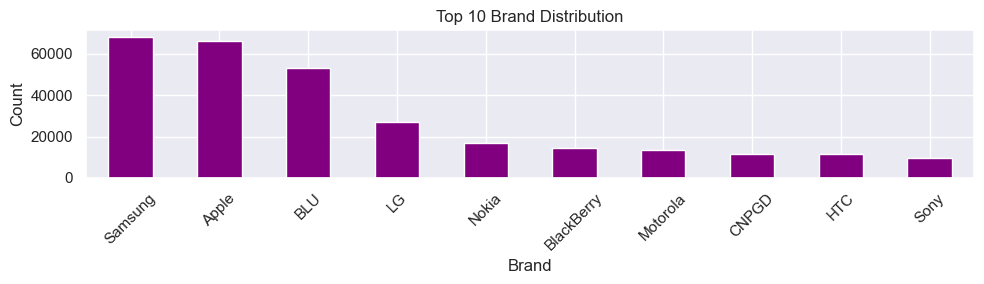

In [21]:
# Get the top 10 brands
top_10_brands = df['Brand Name'].value_counts().nlargest(10)

# Plot the distribution of top 10 brands
plt.figure(figsize=(10, 3))
top_10_brands.plot(kind='bar', color='purple')
plt.title('Top 10 Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

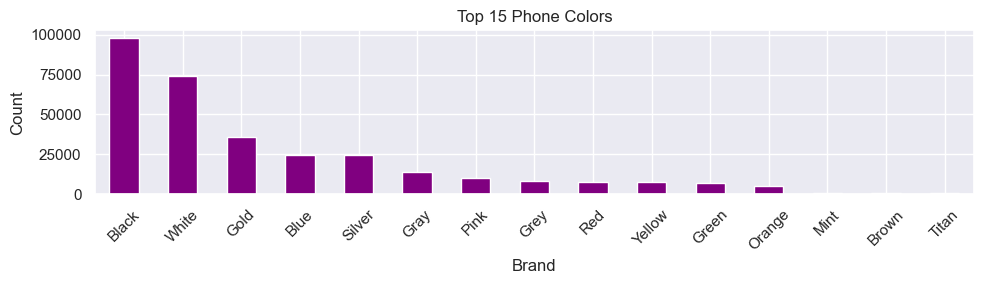

In [22]:
# Get the top 15 phone colors.
top_15_colors = df['Product Color'].value_counts().nlargest(15)

# Plot the distribution of top 10 brands
plt.figure(figsize=(10, 3))
top_15_colors.plot(kind='bar', color='purple')
plt.title('Top 15 Phone Colors')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Price Distribution**

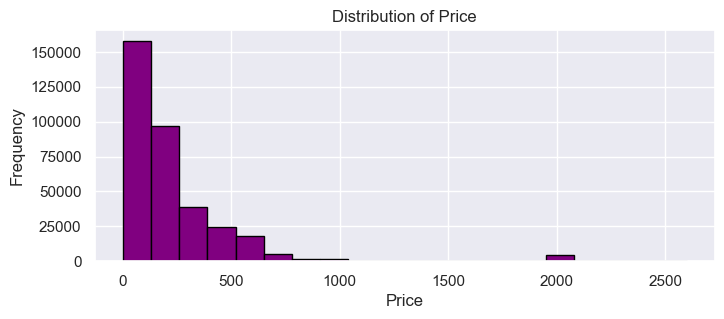

In [23]:
# Histogram of Price
plt.figure(figsize=(8, 3))
plt.hist(df['Price'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



**Vote Distribution**

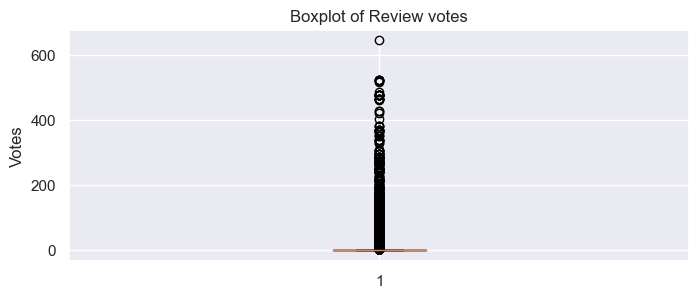

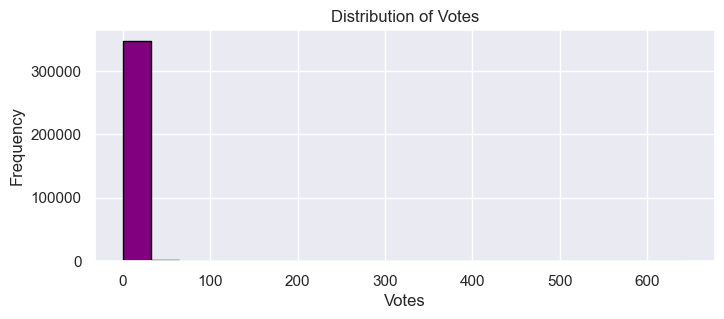

In [24]:
# Box plot of Rating
plt.figure(figsize=(8, 3))
plt.boxplot(df['Review Votes'])
plt.title('Boxplot of Review votes')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

# Histogram of Price
plt.figure(figsize=(8, 3))
plt.hist(df['Review Votes'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution of Rating**

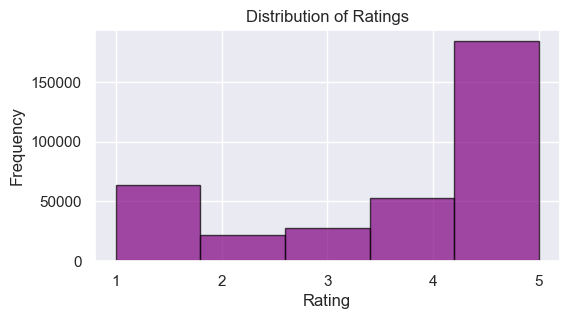

In [25]:
# Plotting the histogram
plt.figure(figsize=(6, 3))
plt.hist(df['Rating'], bins=5, color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()


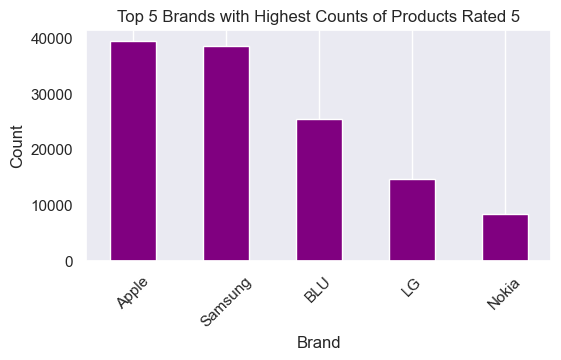

In [26]:
# Filter the data for products with a rating of 5
high_rating_products = df[df['Rating'] == 5]

# Group the filtered data by brand and count the occurrences
brand_counts = high_rating_products.groupby('Brand Name').size()

# Sort the brand counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Select the top 5 largest counts
top_5_brand_counts = sorted_brand_counts.head(5)

# Plot the top 5 largest counts
plt.figure(figsize=(6, 3))
top_5_brand_counts.plot(kind='bar', color='purple')
plt.title('Top 5 Brands with Highest Counts of Products Rated 5')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


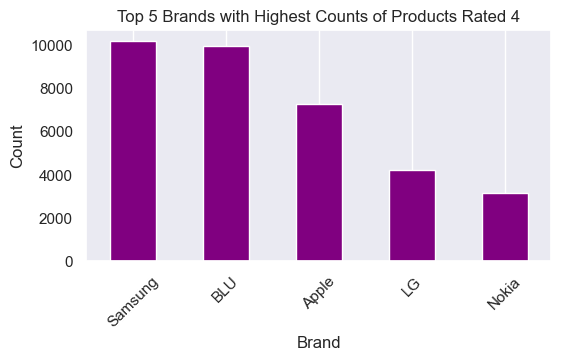

In [27]:
# Filter the data for products with a rating of 4
high_rating_products = df[df['Rating'] == 4]

# Group the filtered data by brand and count the occurrences
brand_counts = high_rating_products.groupby('Brand Name').size()

# Sort the brand counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Select the top 5 largest counts
top_5_brand_counts = sorted_brand_counts.head(5)

# Plot the top 5 largest counts
plt.figure(figsize=(6, 3))
top_5_brand_counts.plot(kind='bar', color='purple')
plt.title('Top 5 Brands with Highest Counts of Products Rated 4')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

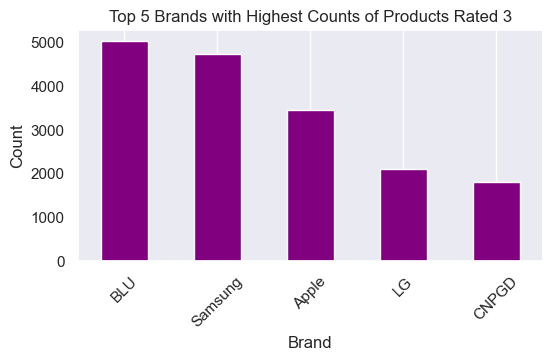

In [28]:
# Filter the data for products with a rating of 3
high_rating_products = df[df['Rating'] == 3]

# Group the filtered data by brand and count the occurrences
brand_counts = high_rating_products.groupby('Brand Name').size()

# Sort the brand counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Select the top 5 largest counts
top_5_brand_counts = sorted_brand_counts.head(5)

# Plot the top 5 largest counts
plt.figure(figsize=(6, 3))
top_5_brand_counts.plot(kind='bar', color='purple')
plt.title('Top 5 Brands with Highest Counts of Products Rated 3')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

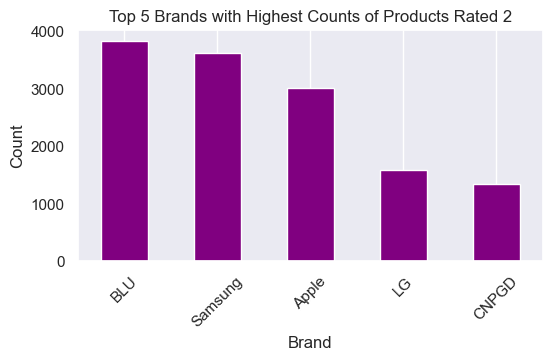

In [29]:
# Filter the data for products with a rating of 2
high_rating_products = df[df['Rating'] == 2]

# Group the filtered data by brand and count the occurrences
brand_counts = high_rating_products.groupby('Brand Name').size()

# Sort the brand counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Select the top 5 largest counts
top_5_brand_counts = sorted_brand_counts.head(5)

# Plot the top 5 largest counts
plt.figure(figsize=(6, 3))
top_5_brand_counts.plot(kind='bar', color='purple')
plt.title('Top 5 Brands with Highest Counts of Products Rated 2')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

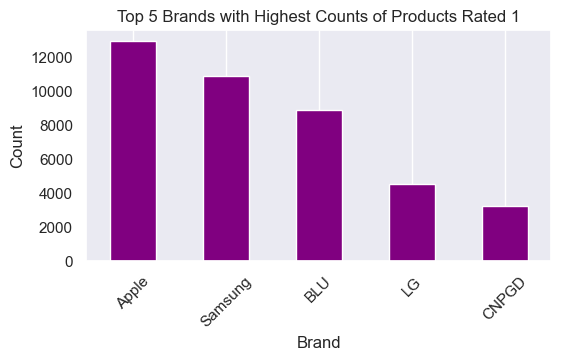

In [30]:
# Filter the data for products with a rating of 1
high_rating_products = df[df['Rating'] == 1]

# Group the filtered data by brand and count the occurrences
brand_counts = high_rating_products.groupby('Brand Name').size()

# Sort the brand counts in descending order
sorted_brand_counts = brand_counts.sort_values(ascending=False)

# Select the top 5 largest counts
top_5_brand_counts = sorted_brand_counts.head(5)

# Plot the top 5 largest counts
plt.figure(figsize=(6, 3))
top_5_brand_counts.plot(kind='bar', color='purple')
plt.title('Top 5 Brands with Highest Counts of Products Rated 1')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Exploring the relationship between Price and Rating**

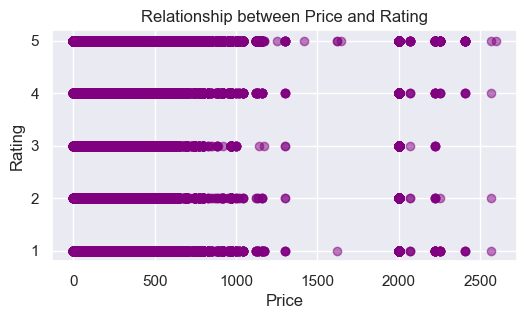

In [31]:
# Extracting price and rating columns
prices = df['Price']
ratings = df['Rating']

# Creating a scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(prices, ratings, color='purple', alpha=0.5)
plt.title('Relationship between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# 5. Text Preparation and Analysis

#### Text Cleaning

In [32]:
# Lowercase all text in the review column
df["Reviews"] = df["Reviews"].str.lower()

In [33]:
# Remove non-alphabets
df["Reviews"] = df["Reviews"].str.replace('[^a-zA-Z\s]', '')

#### Review Count

In [34]:
def word_count(text):
    words = re.findall(r'\b\w+\b', str(text))   # Use regex to find words
    return len(words)
df['Word count'] = df['Reviews'].apply(word_count)
df['Review length'] = df['Reviews'].astype(str).apply(len)
df.head(2)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Product Color,Word count,Review length
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,i feel so lucky to have found this used (phone...,1.00,None,72,374
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.00,None,40,214


#### Review Sentiment

In [35]:
#!pip install TextBlob
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [36]:
# Applying the function to the 'Reviews' column to get sentiment labels
df['Sentiment'] = df['Reviews'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Display the sentiment distribution
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
Sentiment
Positive    255041
Neutral      49399
Negative     45026
Name: count, dtype: int64


In [37]:
# Review Polarity

def get_polarity(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply the function to the 'Reviews' column to get polarity scores
df['Polarity'] = df['Reviews'].apply(get_polarity)
df.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Product Color,Word count,Review length,Sentiment,Polarity
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,i feel so lucky to have found this used (phone...,1.00,None,72,374,Positive,0.18
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.00,None,40,214,Positive,0.45


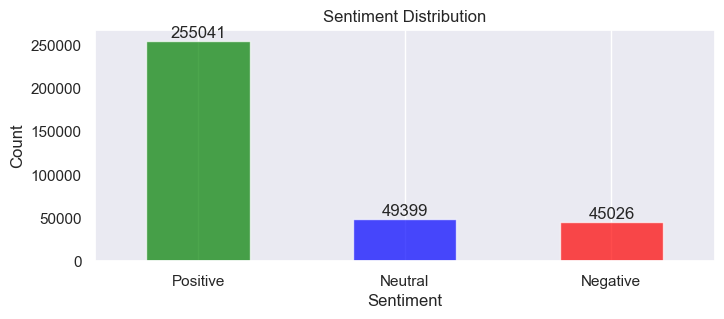

In [38]:

# Visualize the sentiment distribution
plt.figure(figsize=(8, 3))
ax=sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
val = df['Sentiment'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=val)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### Text Elements Distribution

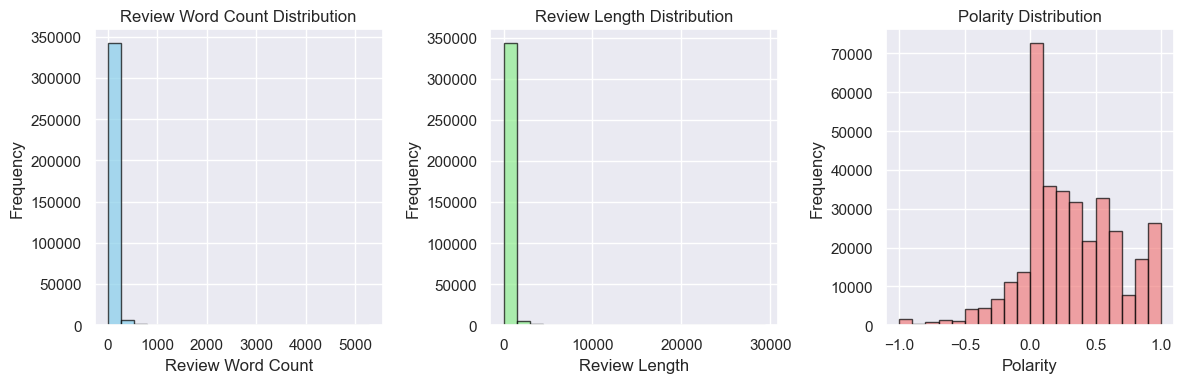

In [39]:
import matplotlib.pyplot as plt

# Review count distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(df['Word count'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Review Word Count Distribution')
plt.xlabel('Review Word Count')
plt.ylabel('Frequency')

# Review length distribution
plt.subplot(1, 3, 2)
plt.hist(df['Review length'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

# Polarity distribution
plt.subplot(1, 3, 3)
plt.hist(df['Polarity'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [88]:
df['Word count'].max(), df['Word count'].min()

(5287, 0)

In [90]:
df['Word count'].median()

20.0

# 6 Features Extraction and Topic Modeling

### Review Features extraction

In [48]:
#!pip install spacy
# Run via terminal: python -m spacy download en_core_web_sm
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [49]:
# Define function to extract key features from a review
def extract_key_features(text):
    doc = nlp(text)
    key_features = []
    for token in doc:
        # Check if token is a noun or an adjective (can be modified based on specific requirements)
        if token.pos_ in ['NOUN', 'PROPN', 'ADJ']:
            key_features.append(token.text)
    return key_features

In [50]:
# Apply the function to extract key features from each review
df['Key Features'] = df['Reviews'].apply(extract_key_features)

In [51]:
df[56:58]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Product Color,Word count,Review length,Sentiment,Polarity,Key Features
57,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,used this unlocked gsm nokia asha 302 in the p...,1.00,White,102,559,Positive,0.18,"[unlocked, gsm, nokia, asha, philippines, jan,..."
58,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,excelente,0.00,White,1,9,Neutral,0.00,[excelente]


#### Review Feature Frequency Analysis

In [52]:
from collections import Counter

# Flatten the list of key features
all_key_features = [feature for sublist in df['Key Features'] for feature in sublist]

# Count the frequency of each key feature
feature_counts = Counter(all_key_features)

In [53]:
# Create a DataFrame from the Counter
feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['Frequency'])
feature_df.reset_index(inplace=True)
feature_df.columns = ['Feature', 'Frequency']

# Display the most common key features and their frequencies
print("Top 10 Most Common Key Features:")
feature_df.nlargest(10, 'Frequency')

Top 10 Most Common Key Features:


,Feature,Frequency
1,phone,387493
25,great,87985
28,good,84335
98,screen,51959
53,battery,47846
52,new,39386
86,time,32718
87,camera,32250
219,price,31501
109,product,29845


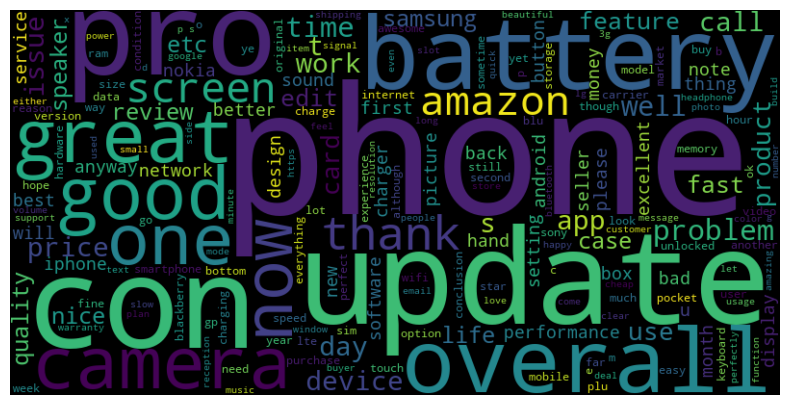

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract key features from the LDA descriptive words
key_features = feature_df['Feature'].explode().tolist()

# Convert the list of key features into a single string
text = ' '.join(key_features)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Review Topic Modelling

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert the list of key features into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform([" ".join(features) for features in df['Key Features']])

# Apply LDA
num_topics = 10  # Number of topics to identify
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
print("Top words for each topic:")
for i, topic in enumerate(lda.components_, start=1):
    print(f"Topic {i}:")
    top_words_idx = topic.argsort()[-11:]  # Get indices of top 5 words (corrected indexing)
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    print(top_words)
    print()  # Add a newline for better readability


Top words for each topic:
Topic 1:
['bien', 'por', 'para', 'la', 'producto', 'venezuela', 'que', 'lo', 'muy', 'excelente', 'el']

Topic 2:
['life', 'time', 'android', 'app', 'quality', 'apps', 'battery', 'good', 'camera', 'screen', 'phone']

Topic 3:
['problem', 'product', 'warranty', 'months', 'case', 'seller', 'box', 'amazon', 'new', 'screen', 'phone']

Topic 4:
['ok', 'shipping', 'quality', 'amazing', 'awesome', 'fast', 'camera', 'price', 'nice', 'phone', 'great']

Topic 5:
['android', 'card', 'storage', 'sd', 'galaxy', 'device', 'memory', 'samsung', 'blu', 'phone', 'gb']

Topic 6:
['quality', 'seller', 'condition', 'gift', 'great', 'happy', 'price', 'product', 'excellent', 'phone', 'good']

Topic 7:
['old', 'calls', 'problem', 'issues', 'time', 'phones', 'brand', 'problems', 'great', 'new', 'phone']

Topic 8:
['condition', 'charge', 'charger', 'day', 'perfect', 'time', 'watch', 'life', 'great', 'phone', 'battery']

Topic 9:
['service', 'international', 'carrier', 'version', 'networ

In [56]:
 import pandas as pd

# Define the titles and top words for each topic
topics = {
    1: ["Positive Product Experience", ['bien', 'por', 'para', 'la', 'producto', 'venezuela', 'que', 'lo', 'muy', 'excelente', 'el']],
    2: ["Phone Features and Performance", ['life', 'time', 'android', 'app', 'quality', 'apps', 'battery', 'good', 'camera', 'screen', 'phone']],
    3: ["Issues with Product and Warranty", ['problem', 'product', 'warranty', 'months', 'case', 'seller', 'box', 'amazon', 'new', 'screen', 'phone']],
    4: ["Positive Reviews for Fast Shipping", ['ok', 'shipping', 'quality', 'amazing', 'awesome', 'fast', 'camera', 'price', 'nice', 'phone', 'great']],
    5: ["Storage and Memory Options", ['android', 'card', 'storage', 'sd', 'galaxy', 'device', 'memory', 'samsung', 'blu', 'phone', 'gb']],
    6: ["Satisfied with Product Quality", ['quality', 'seller', 'condition', 'gift', 'great', 'happy', 'price', 'product', 'excellent', 'phone', 'good']],
    7: ["Concerns About Older Phones", ['old', 'calls', 'problem', 'issues', 'time', 'phones', 'brand', 'problems', 'great', 'new', 'phone']],
    8: ["Battery Life and Charging Experience", ['condition', 'charge', 'charger', 'day', 'perfect', 'time', 'watch', 'life', 'great', 'phone', 'battery']],
    9: ["International Compatibility and Carrier Services", ['service', 'international', 'carrier', 'version', 'network', 'data', 'mobile', 'unlocked', 'card', 'sim', 'phone']],
    10: ["Comparing Phone Sizes and Features", ['small', 'big', 'size', 'old', 'better', 'great', 'phones', 'screen', 'best', 'iphone', 'phone']]
}

# Create a DataFrame
df_ReviewTopics = pd.DataFrame(topics.values(), columns=['Suggested Title', 'LDA Descriptive Words'], index=topics.keys())

# Display the DataFrame
df_ReviewTopics


,Suggested Title,LDA Descriptive Words
1,Positive Product Experience,"[bien, por, para, la, producto, venezuela, que..."
2,Phone Features and Performance,"[life, time, android, app, quality, apps, batt..."
3,Issues with Product and Warranty,"[problem, product, warranty, months, case, sel..."
4,Positive Reviews for Fast Shipping,"[ok, shipping, quality, amazing, awesome, fast..."
5,Storage and Memory Options,"[android, card, storage, sd, galaxy, device, m..."
6,Satisfied with Product Quality,"[quality, seller, condition, gift, great, happ..."
7,Concerns About Older Phones,"[old, calls, problem, issues, time, phones, br..."
8,Battery Life and Charging Experience,"[condition, charge, charger, day, perfect, tim..."
9,International Compatibility and Carrier Services,"[service, international, carrier, version, net..."
10,Comparing Phone Sizes and Features,"[small, big, size, old, better, great, phones,..."


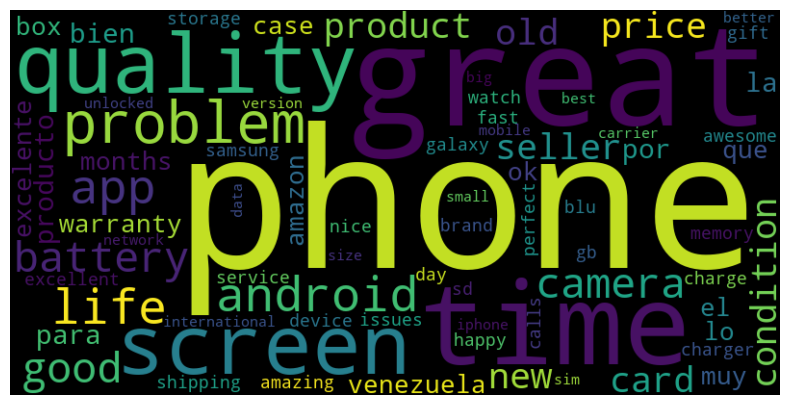

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract key features from the LDA descriptive words
key_features = df_ReviewTopics['LDA Descriptive Words'].explode().tolist()

# Convert the list of key features into a single string
text = ' '.join(key_features)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Key Feature Extraction from Product Name

In [58]:
# Lowercase all text
df["Product Name"] = df["Product Name"].str.lower()

In [59]:
# Remove non-alphabets
df["Product Name"] = df["Product Name"].str.replace('[^a-zA-Z\s]', '')

#### Cleaning and Tokeninzation with Spacy

In [60]:
import re
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define function to preprocess text and extract key features from a product name
def extract_key_features_from_product_name(text):
    # Remove asterisks and quotes
    cleaned_text = re.sub(r'[*"]', '', text)
    # Tokenize the cleaned text
    doc = nlp(cleaned_text)
    key_features = []
    for token in doc:
        # Check if token is a noun or an adjective
        if token.pos_ in ['NOUN', 'PROPN', 'ADJ']:
            key_features.append(token.text)
    return key_features

In [61]:
# Apply the function to the 'Product Name' column to get key features
df['Product Key Features'] = df['Product Name'].apply(extract_key_features_from_product_name)

In [62]:
df[['Product Name', 'Product Key Features']].head()

,Product Name,Product Key Features
0,"""clear clean esn"" sprint epic 4g galaxy sph-d7...","[clean, esn, sprint, epic, g, galaxy, sph, d70..."
1,"""clear clean esn"" sprint epic 4g galaxy sph-d7...","[clean, esn, sprint, epic, g, galaxy, sph, d70..."
2,"""clear clean esn"" sprint epic 4g galaxy sph-d7...","[clean, esn, sprint, epic, g, galaxy, sph, d70..."
3,"""clear clean esn"" sprint epic 4g galaxy sph-d7...","[clean, esn, sprint, epic, g, galaxy, sph, d70..."
4,"""clear clean esn"" sprint epic 4g galaxy sph-d7...","[clean, esn, sprint, epic, g, galaxy, sph, d70..."


In [63]:
df['Product Name'][0]

'"clear clean esn" sprint epic 4g galaxy sph-d700*front camera*android*slider*qwerty keyboard*touch screen'

#### Extracting Common theme in Product Column

In [64]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# # Convert the product names into a list of strings
# product_names = df['Product Name'].tolist()

# # Initialize CountVectorizer to convert text data into a document-term matrix
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# # Fit and transform the product names to generate the document-term matrix
# dtm = vectorizer.fit_transform(product_names)

# # Apply LDA
# num_topics = 10  # Number of topics to identify
# lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
# lda.fit(dtm)

# # Display the top words for each topic
# print("Top words for each topic:")
# for i, topic in enumerate(lda.components_, start=1):
#     print(f"Topic {i}:")
#     top_words_idx = topic.argsort()[:-11]  # Get indices of top 5 words
#     top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
#     print(top_words)
#     print()


**Based on the common themes present in the topics generated by the LDA model,we can infer the general topics or categories that the words represent. Here are the suggested titles for each topic:**

* Topic 1: "Technical Specifications and Components"
* Topic 2: "Smartphone Models and Features"
* Topic 3: "Mobile Devices and Accessories"
* Topic 4: "Phone Models and Characteristics"
* Topic 5: "Phone Color and Packaging"
* Topic 6: "Refurbished and Certified Devices"
* Topic 7: "Rugged and Protective Phones"
* Topic 8: "Connectivity and Multimedia Features"
* Topic 9: "Camera Specifications and Options"
* Topic 10: "Wireless Contracts and Network Specifications"

# 7. Relationship between Ratings, Reviews Sentiments and Review Votes

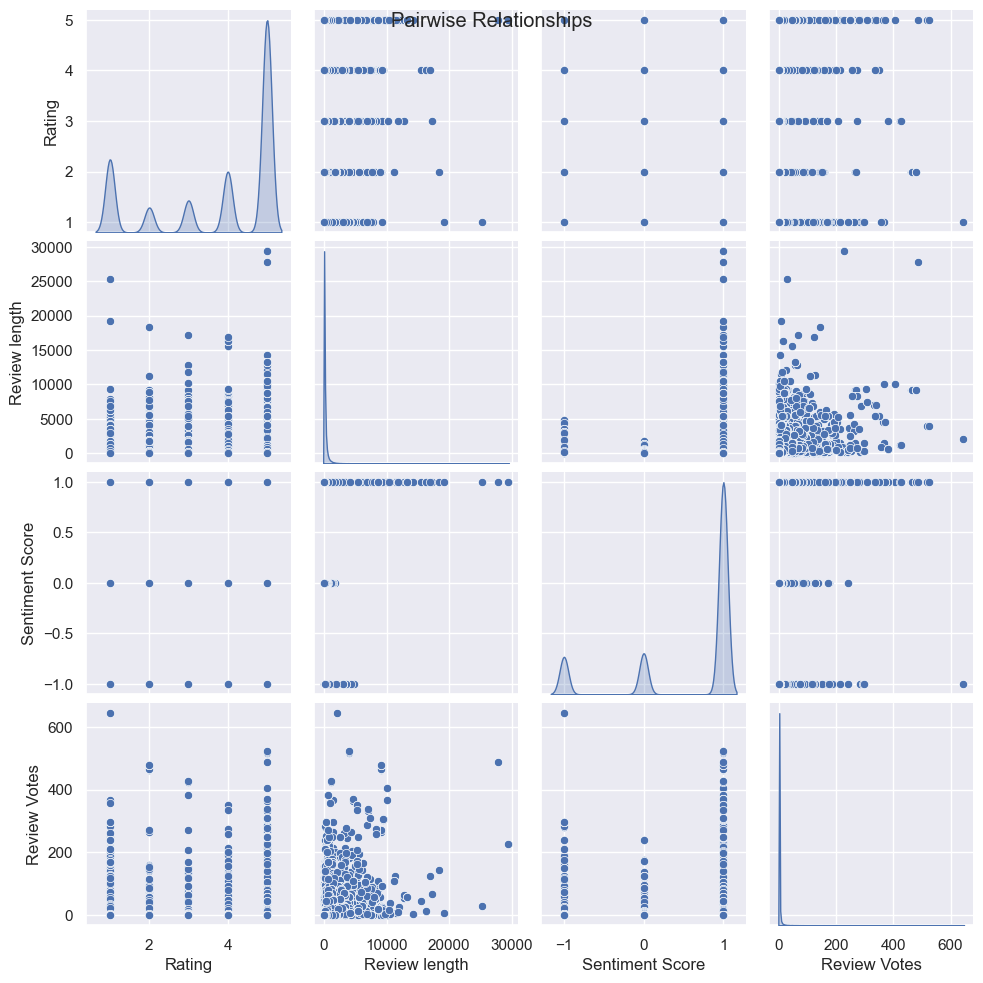

In [65]:
import seaborn as sns

# Convert sentiments to numbers (e.g., Positive: 1, Neutral: 0, Negative: -1)
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment Score'] = df['Sentiment'].map(sentiment_mapping)

# Plot pairwise relationships between variables
sns.pairplot(df[['Rating', 'Review length', 'Sentiment Score', 'Review Votes']], diag_kind='kde')
plt.suptitle('Pairwise Relationships')
plt.show()

**Relationships between variables:**

* **Review Votes vs Rating:** There appears to be a weak positive correlation between the number of review votes and the rating. This means that data points tend to cluster together in the bottom left and top right corners, indicating that products with higher ratings tend to also have more review votes, and vice versa. 
* **Review Votes vs Sentiment Score and Review Length:** It's difficult to discern a clear linear relationship between review votes and either sentiment score or review length. There might be a slight positive correlation for sentiment score, but it's weak. 
* **Sentiment Score vs Rating:** There seems to be a weak positive correlation between sentiment score and rating. Points are scattered but show a slight upward trend, suggesting that products with higher ratings tend to have more positive sentiment scores.
* **Sentiment Score vs Review Length:** No clear linear relationship is evident between sentiment score and review length. There's a cloud of points spread across the range of sentiment scores for all review lengths.  
* **Review Length vs Rating:**  There's no obvious linear relationship between review length and rating. The data points show a scattered pattern across the entire range of both variables.

**Distribution of variables:**

* **Review Votes:** The distribution of review votes appears skewed to the right, with a longer tail towards higher numbers of votes. There might be a few outliers with very high numbers of votes. 
* **Sentiment Score:** The distribution of sentiment scores seems centered around a value slightly above 0, with a slightly longer tail towards positive sentiment scores (higher values). 
* **Rating:** The distribution of ratings is centered around a value slightly above 3 on a 5-point scale.
* **Review Length:** The distribution of review lengths appears skewed to the right, with more reviews on the shorter side and a few outliers on the longer end (longer reviews).  

**Overall:**

The pairplot suggests some weak positive correlations between review votes and both rating and sentiment score. However, the relationships are not very strong. There seems to be no clear linear relationship between sentiment score, review length, and rating. The distributions of the variables provide insights into the range of values and potential outliers for each variable. 


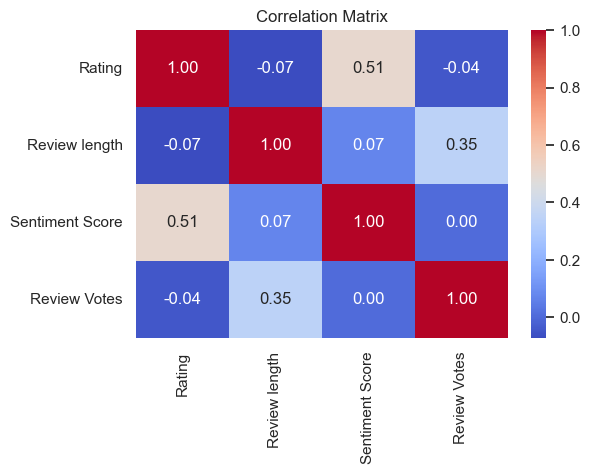

In [66]:
# Calculate correlation matrix
corr_matrix = df[['Rating', 'Review length', 'Sentiment Score', 'Review Votes']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 8. Brand perceptions Based on Review Sentiment and Rating Distribution.

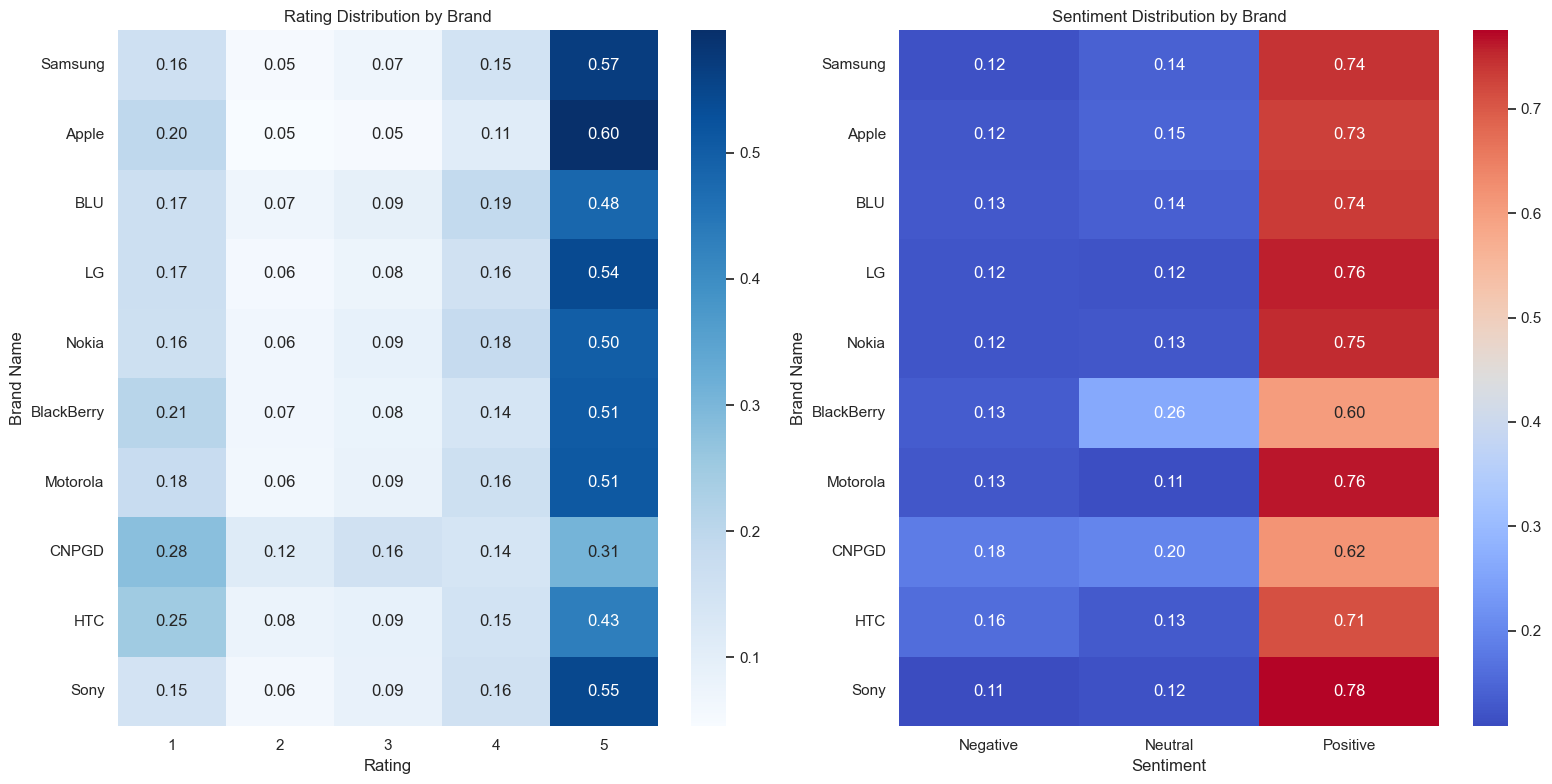

In [67]:
# Extract Brands
top_brands = df['Brand Name'].value_counts().head(10).index.tolist()

# Calculate Rating Distribution
rating_distribution = df.groupby('Brand Name')['Rating'].value_counts(normalize=True).unstack().fillna(0)
top_brands_rating = rating_distribution.loc[top_brands]

# Calculate Sentiment Distribution
sentiment_distribution = df.groupby('Brand Name')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
top_brands_sentiment = sentiment_distribution.loc[top_brands]

# Visualize the Results
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.heatmap(top_brands_rating, annot=True, cmap='Blues', fmt=".2f")
plt.title('Rating Distribution by Brand')

plt.subplot(1, 2, 2)
sns.heatmap(top_brands_sentiment, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sentiment Distribution by Brand')

plt.tight_layout()
plt.show()


#### Heatmap Interpretation

**The heatmaps show the distribution of ratings (1 to 5) and sentiment (Negative, Neutral, Positive) for the top 10 brands. Darker colors represent a higher concentration of data points in that category.**



1. **Rating Distribution:** Look for the row corresponding to a brand in the "Rating Distribution by Brand" heatmap. See where the darker colors lie. 
    * If the darker colors are concentrated towards the higher end (like 0.8 or 0.9), it suggests a higher proportion of users give the brand positive ratings.
    * If the colors are spread out more evenly, it indicates a wider range of ratings, with users giving  both high and low ratings.

2. **Sentiment Distribution:** Look for the brand row in the "Sentiment Distribution by Brand" heatmap.
    * A darker color in the "Positive" column suggests a higher proportion of positive sentiment in reviews about the brand.
    * A dark color in the "Neutral" column indicates a more neutral sentiment.
    * Similarly, a dark color in the "Negative" column implies a higher concentration of negative reviews for the brand.
    
**By looking at both heatmaps, we can gain insights into how users perceive different brands based on their ratings and the sentiment expressed in their reviews.**     

Let's interpret the heatmaps for some brands:

  * We can see that Brand **"Samsung"** has a slight concentration in Ratings 1 and 4 and the most concentration of Ratings on 5 indicating a spread between lower and moderate ratings. In terms of sentiment, it appears to have a more balanced distribution across Negative, Neutral, and Positive categories.
  
  * **"Apple"** on the other hand has a slight concentration of Rating 1 and 4 and highest concentration of Ratings at 5 which also indicate a spread in lower ratings but its higher ratings was more than samsung's. In terms of sentiment distribution, although similar to that of samsung's we can see that apple colour shades were slightly lighter indicating lesser amount of review givers than Samsung. Overall, an even spread of across all 3 sentiments is observed.
    


# 9. Developing predictive models to forecast product ratings 

**The data head...**

In [57]:
df.head(3)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Product Color
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.00,None
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.00,None
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.00,None


**Ensuring data completion before selection, since I won't be using the color column, I'll ignore its missing data.**

In [58]:
df.isnull().sum()

Product Name         0
Brand Name           0
Price                0
Rating               0
Reviews              0
Review Votes         0
Product Color    27450
dtype: int64

In [59]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

#### Data Splitting

In [60]:
sample_df = df.sample(n=100000, random_state=42)  # Set random_state for reproducibility

In [61]:
X = sample_df['Reviews'].copy()
y = sample_df['Rating'].copy()

In [62]:
y.shape[0]

100000

Apostrophe dictionary

In [63]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

#### Cleaning

In [64]:
nlp = spacy.load("en_core_web_sm")
stop = stopwords.words('english')
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']
X_cleaned = cleanData(X)
X_cleaned.head()

0      arrive time work great easily set phone service
1    buy phone little brother use basic bbpin whats...
2    could get quality price worth buy regret synch...
3                                            excelente
4    stop work couple week talk everyone speaker ph...
Name: clean_reviews, dtype: object

#### Encoding

In [65]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']
           
y = sample_df['Rating'].copy()
y.replace(encoding, inplace=True)
y = to_categorical(y,5)

Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, stratify=y, random_state=42,test_size=0.1)
#validation split will done when fitting the model

#### Using Keras to convert text to sequence

In [67]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_length = max([len(x) for x in X_train])
vocab_size = len(tokenizer.word_index)+1 #add 1 to account for unknown word
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
X_train = pad_sequences(X_train, max_length ,padding='post')

Vocabulary size: 29274
Max length of sentence: 1579


**Sequential model**

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.layers import Bidirectional,Embedding,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
embedding_vector_length=32
num_classes = 5
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(250,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint('../model/model.h5', save_best_only=True, 
                             save_weights_only=False)]
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1579, 32)          936768    
                                                                 
 bidirectional_1 (Bidirecti  (None, 1579, 500)         566000    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 1579, 500)         0         
                                                                 
 flatten_1 (Flatten)         (None, 789500)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               101056128 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

**Model Fitting**

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.11, 
                    epochs=15, batch_size=32, verbose=1,
                    callbacks=callbacks)

Epoch 1/15
2504/2504 [==============================] - 424240s 169s/step - loss: 0.9750 - accuracy: 0.6476 - val_loss: 0.8805 - val_accuracy: 0.6672
Epoch 2/15
2504/2504 [==============================] - 330239s 132s/step - loss: 0.8387 - accuracy: 0.6828 - val_loss: 0.8824 - val_accuracy: 0.6527
Epoch 3/15
2178/2504 [=========================>....] - ETA: 18:44:59 - loss: 0.7843 - accuracy: 0.7029

In [ ]:
Result plotting

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.figure()

plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],label='Validation')
plt.legend()
plt.title('Training and Validation accuracy')

In [ ]:
Prediction Test

In [ ]:
X_test_token = tokenizer.texts_to_sequences(X_test)
X_test_token = pad_sequences(X_test_token, max_length ,padding='post')
pred = model.predict(X_test_token)
pred = to_categorical(pred,5)

In [ ]:
Accuracy and classification

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
print('Test Accuracy: {}'.format(accuracy_score(pred, y_test)))
print(classification_report(y_test, pred, target_names=labels))